# Capstone 2 - Baseball Stat Projections - Pre-Processing

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
import statsmodels.api as sm 
import statsmodels.regression as smr

In [10]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data"
os.chdir(path)
df = pd.read_csv('Baseball_DW.csv', index_col=0)
df.head()

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,ops,year_of_career,age,lg_avg_ops,ops_vs_lg_avg,ops-1,ops-2,ops-3,ab-1,short_prev_season
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.796151,1,26,0.725845,0.070306,0.000000,0.000000,0.000000,0.0,n
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,0.488964,2,27,0.742906,-0.253941,0.796151,0.000000,0.000000,244.0,n
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0.739887,3,28,0.765614,-0.025727,0.488964,0.796151,0.000000,57.0,y
3,abbotje01,2001,28,42.0,5.0,11.0,3.0,0.0,0.0,5.0,...,0.659420,4,29,0.726591,-0.067171,0.739887,0.488964,0.796151,215.0,n
4,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0.691086,0,24,0.694335,-0.003249,0.000000,0.000000,0.000000,0.0,n


In [11]:
# Remove highly correlated items to avoid multicollinearity
df.drop(['obp', 'slg'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13337 entries, 0 to 13336
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          13337 non-null  object 
 1   year               13337 non-null  int64  
 2   g                  13337 non-null  int64  
 3   ab                 13337 non-null  float64
 4   r                  13337 non-null  float64
 5   h                  13337 non-null  float64
 6   double             13337 non-null  float64
 7   triple             13337 non-null  float64
 8   hr                 13337 non-null  float64
 9   rbi                13337 non-null  float64
 10  sb                 13337 non-null  float64
 11  cs                 13337 non-null  float64
 12  bb                 13337 non-null  float64
 13  so                 13337 non-null  float64
 14  ibb                13337 non-null  float64
 15  hbp                13337 non-null  float64
 16  sh                 133

In [12]:
# encode categorical features with dummy variables

dfo = pd.DataFrame(df['short_prev_season'])
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,year_of_career,age,lg_avg_ops,ops_vs_lg_avg,ops-1,ops-2,ops-3,ab-1,short_prev_season_n,short_prev_season_y
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,1,26,0.725845,0.070306,0.000000,0.000000,0.000000,0.0,1,0
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,2,27,0.742906,-0.253941,0.796151,0.000000,0.000000,244.0,1,0
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,3,28,0.765614,-0.025727,0.488964,0.796151,0.000000,57.0,0,1
3,abbotje01,2001,28,42.0,5.0,11.0,3.0,0.0,0.0,5.0,...,4,29,0.726591,-0.067171,0.739887,0.488964,0.796151,215.0,1,0
4,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0,24,0.694335,-0.003249,0.000000,0.000000,0.000000,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13332,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,2,24,0.687659,-0.156276,0.660466,0.000000,0.000000,438.0,1,0
13333,zupcibo01,1991,18,25.0,3.0,4.0,0.0,0.0,1.0,3.0,...,0,25,0.675643,-0.203336,0.000000,0.000000,0.000000,0.0,1,0
13334,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,1,26,0.680199,-0.002743,0.472308,0.000000,0.000000,25.0,0,1
13335,zupcibo01,1993,141,286.0,40.0,69.0,24.0,2.0,2.0,26.0,...,2,27,0.694335,-0.023084,0.677456,0.472308,0.000000,392.0,1,0


In [13]:
# Break out response variable and scale data

X = df.drop(['player_id', 'ops'], axis=1)

y = df.ops

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

print(X.head())
print(X_scaled)

   year   g     ab     r     h  double  triple    hr   rbi   sb  ...  \
0  1998  89  244.0  33.0  68.0    14.0     1.0  12.0  41.0  3.0  ...   
1  1999  17   57.0   5.0   9.0     0.0     0.0   2.0   6.0  1.0  ...   
2  2000  80  215.0  31.0  59.0    15.0     1.0   3.0  29.0  2.0  ...   
3  2001  28   42.0   5.0  11.0     3.0     0.0   0.0   5.0  0.0  ...   
4  1993  20   61.0  11.0  15.0     1.0     0.0   3.0   9.0  2.0  ...   

   year_of_career  age  lg_avg_ops  ops_vs_lg_avg     ops-1     ops-2  \
0               1   26    0.725845       0.070306  0.000000  0.000000   
1               2   27    0.742906      -0.253941  0.796151  0.000000   
2               3   28    0.765614      -0.025727  0.488964  0.796151   
3               4   29    0.726591      -0.067171  0.739887  0.488964   
4               0   24    0.694335      -0.003249  0.000000  0.000000   

      ops-3   ab-1  short_prev_season_n  short_prev_season_y  
0  0.000000    0.0                    1                    0  
1 

In [14]:
# Split data into training and test splits

y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=34)

print('max y_train: ' + str(y_train.max()))
print('min y_train: ' + str(y_train.min()))
print('diff: ' + str(y_train.max() - y_train.min()))
print('max X_train: ' + str(X_train.max()))
print('min X_train: ' + str(X_train.min()))
print('diff: ' + str(X_train.max() - X_train.min()))
print('')
print('max y_test: ' + str(y_test.max()))
print('min y_test: ' + str(y_test.min()))
print('diff: ' + str(y_test.max() - y_test.min()))
print('max X_test: ' + str(X_test.max()))
print('min X_test: ' + str(X_test.min()))
print('diff: ' + str(X_test.max() - X_test.min()))

max y_train: 2.0
min y_train: 0.0
diff: 2.0
max X_train: 28.27221471167046
min X_train: -5.057747903078313
diff: 33.32996261474877

max y_test: 2.657142857142857
min y_test: 0.0
diff: 2.657142857142857
max X_test: 12.49569307281681
min X_test: -4.904375221467434
diff: 17.400068294284242


# Capstone 2 - Baseball Stat Projections - Modeling

In [16]:
# Model 1 - Linear Regression
lin_reg = LinearRegression()
model_1 = lin_reg.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:',r2)
print('Mean Absolute Error:',mae)
print('Intercept:', abs(model_1.intercept_))
print(pd.DataFrame(abs(lin_reg.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).head(10))


R-squared: 1.0
Mean Absolute Error: 1.9475092869371045e-16
Intercept: 0.7121594890711903
                Coefficient
ops_vs_lg_avg  1.513745e-01
lg_avg_ops     2.570075e-02
ab             7.532037e-16
h              7.149109e-16
bb             1.761820e-16
g              1.413800e-16
so             1.070575e-16
r              1.032328e-16
salary         9.373969e-17
rbi            9.261038e-17


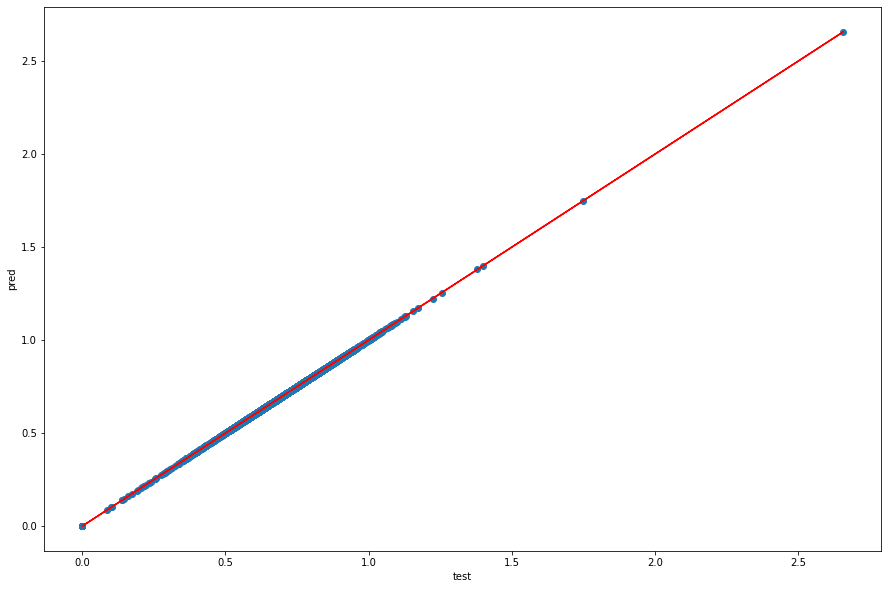

In [27]:
_ = plt.scatter(y_test, y_pred)
_ = plt.rcParams["figure.figsize"] = (15,10)
m, p = np.polyfit(y_test, y_pred, 1)
_ = plt.plot(y_test, m*y_test + p, color='red')
_ = plt.xlabel('test')
_ = plt.ylabel('pred')
_ = plt.show()

In [18]:
# Break out response variable and scale data for Model 2 - OLS

#X2 = df.drop(['player_id', 'ops', 'hr', 'h', 'r', 'double', 'rbi'], axis=1)
X2 = df.drop(['player_id', 'ops'], axis=1)
X2 = sm.add_constant(X2)

y2 = df.ops

scaler2 = StandardScaler().fit(X2)

X_scaled2 = scaler2.transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.25, random_state=34)

print(X2.head())
print(X_scaled2)

   const  year   g     ab     r     h  double  triple    hr   rbi  ...  \
0    1.0  1998  89  244.0  33.0  68.0    14.0     1.0  12.0  41.0  ...   
1    1.0  1999  17   57.0   5.0   9.0     0.0     0.0   2.0   6.0  ...   
2    1.0  2000  80  215.0  31.0  59.0    15.0     1.0   3.0  29.0  ...   
3    1.0  2001  28   42.0   5.0  11.0     3.0     0.0   0.0   5.0  ...   
4    1.0  1993  20   61.0  11.0  15.0     1.0     0.0   3.0   9.0  ...   

   year_of_career  age  lg_avg_ops  ops_vs_lg_avg     ops-1     ops-2  \
0               1   26    0.725845       0.070306  0.000000  0.000000   
1               2   27    0.742906      -0.253941  0.796151  0.000000   
2               3   28    0.765614      -0.025727  0.488964  0.796151   
3               4   29    0.726591      -0.067171  0.739887  0.488964   
4               0   24    0.694335      -0.003249  0.000000  0.000000   

      ops-3   ab-1  short_prev_season_n  short_prev_season_y  
0  0.000000    0.0                    1              

In [19]:
# Model 2 - Linear Regression with fewer features

lin_reg2 = smr.linear_model.OLS(y_train2, X_train2)
model_2 = lin_reg2.fit()
y_pred2 = model_2.predict(X_test2)

# Evaluation Metrics
r2_2 = r2_score(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)

print('R-squared:',r2_2)
print('Mean Absolute Error:',mae2)
model_2.summary()

R-squared: -21.29177444449476
Mean Absolute Error: 0.7136252956334768


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ops   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              13.51
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                    4.08e-76
Time:                        15:55:03   Log-Likelihood:                         -10794.
No. Observations:               10002   AIC:                                  2.166e+04
Df Residuals:                    9967   BIC:                                  2.191e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.288e-19   5.61e-18      0.112      0.911   -1.04e-17    1.16e-17
x1             0.0097      0.009      1.122      0.262      -0.007       0.027
x2            -0.0108      0.030     -0.358      0.721      -0.070       0.048
x3            -0.0241      0.069     -0.347      0.728      -0.160       0.112
x4             0.0356      0.038      0.948      0.343      -0.038       0.109
x5            -0.0008      0.060     -0.013      0.990      -0.118       0.117
x6             0.0023      0.020      0.116      0.908      -0.037       0.042
x7            -0.0054      0.010     -0.526      0.599      -0.026       0.015
x8            -0.0270      0.024     -1.111      0.266      -0.075       0.021
x9             0.0320      0.034      0.933      0.351      -0.035       0.099
x10           -0.0019      0.013     -0.139      0.890      -0.028       0.024
x11            0.0053      0.013      0.424      0.672      -0.019       0.030
x12           -0.0021      0.017     -0.125      0.901      -0.035       0.031
x13            0.0019      0.017      0.116      0.907      -0.031       0.035
x14            0.0010      0.010      0.100      0.920      -0.019       0.021
x15           -0.0031      0.009     -0.359      0.719      -0.020       0.014
x16           -0.0044      0.010     -0.458      0.647      -0.023       0.015
x17           -0.0017      0.011     -0.157      0.875      -0.024       0.020
x18            0.0017      0.012      0.137      0.891      -0.023       0.026
x19            0.0056      0.026      0.214      0.830      -0.045       0.056
x20            0.0007      0.029      0.024      0.981      -0.056       0.057
x21            0.0022      0.028      0.079      0.937      -0.053       0.057
x22           -0.0030      0.028     -0.110      0.912      -0.057       0.051
x23           -0.0009      0.029     -0.031      0.975      -0.058       0.057
x24            0.0031      0.044      0.070      0.944      -0.084       0.090
x25           -0.0043      0.017     -0.248      0.804      -0.038       0.029
x26           -0.0062      0.010     -0.613      0.540      -0.026       0.014
x27           -0.0021      0.018     -0.114      0.909      -0.038       0.034
x28            0.0071      0.018      0.404      0.686      -0.028       0.042
x29            0.0245      0.008      3.175      0.002       0.009       0.040
x30            0.1463      0.011     13.638      0.000       0.125       0.167
x31           -0.0050      0.014     -0.362      0.718      -0.032       0.022
x32            0.0027      0.013      0.203      0.839      -0.023       0.028
x33           -0.0015      0.013     -0.117      0.907      -0.026       0.023
x34            0.0029      0.015      0.187      0.851      -

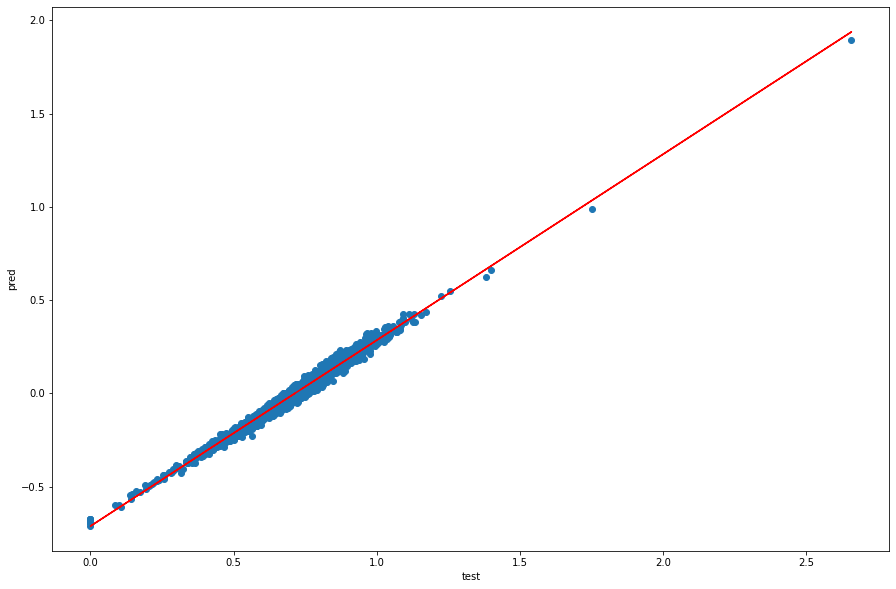

In [20]:
_ = plt.scatter(y_test2, y_pred2)
_ = plt.rcParams["figure.figsize"] = (15,10)
m, p = np.polyfit(y_test2, y_pred2, 1)
_ = plt.plot(y_test2, m*y_test2 + p, color='red')
_ = plt.xlabel('test')
_ = plt.ylabel('pred')
_ = plt.show()

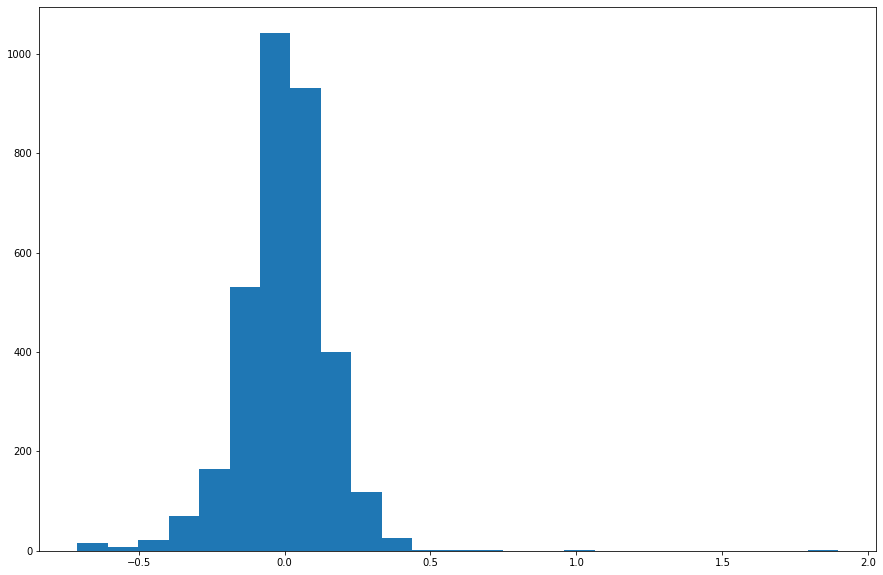

In [21]:
plt.hist(y_pred2, bins=25)
plt.show()

In [28]:
print(np.mean(y_test2), np.mean(y_pred2))

0.712394698551364 -0.0012305970821136721
